In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat dataset
df = pd.read_csv("african_crises.csv")

In [37]:
df.head()

,Country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,Zimbabwe,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,Zimbabwe,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,Zimbabwe,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,Zimbabwe,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,Zimbabwe,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [38]:
df.describe()

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [39]:
df.isnull().sum()

Country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [40]:
df.fillna(method='ffill', inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17796\3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [41]:
df.isnull().sum()

Country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preprocessing
df.dropna(inplace=True)

# Memilih fitur dan target
X = df.drop(columns=['inflation_annual_cpi'])
y = df['inflation_annual_cpi']

# Encoding fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluasi
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

Mean Squared Error: 2280182318779.254


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Mengubah target menjadi kategori
bins = [df['inflation_annual_cpi'].min(), 0, 10, df['inflation_annual_cpi'].max()]
labels = ['Kurang', 'Cukup', 'Baik']
df['grade_category'] = pd.cut(df['inflation_annual_cpi'], bins=bins, labels=labels, include_lowest=True)

# Preprocessing
df.dropna(inplace=True)

# Memilih fitur dan target
X = df.drop(columns=['inflation_annual_cpi'])
y = df['grade_category']

# Encoding fitur kategorikal
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

# Evaluasi
y_pred = classifier.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8349056603773585
              precision    recall  f1-score   support

        Baik       0.90      0.80      0.85        65
       Cukup       0.86      0.88      0.87       121
      Kurang       0.62      0.69      0.65        26

    accuracy                           0.83       212
   macro avg       0.79      0.79      0.79       212
weighted avg       0.84      0.83      0.84       212



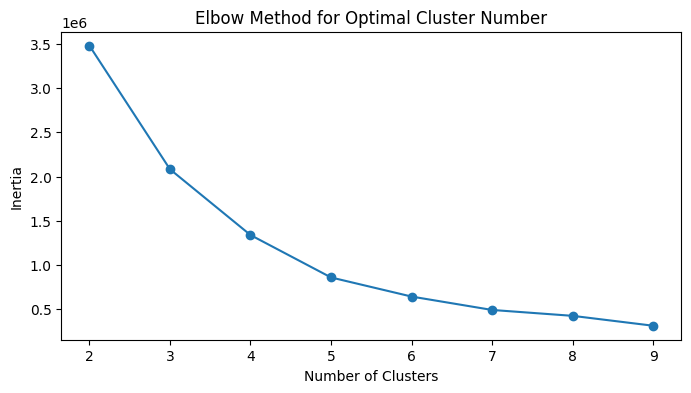

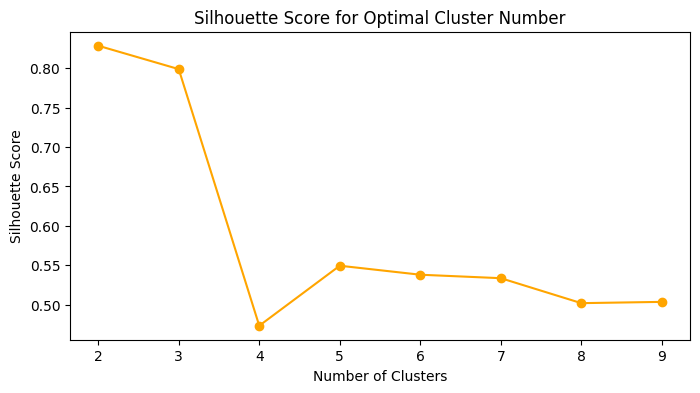

Silhouette Score untuk 2 cluster: 0.8287


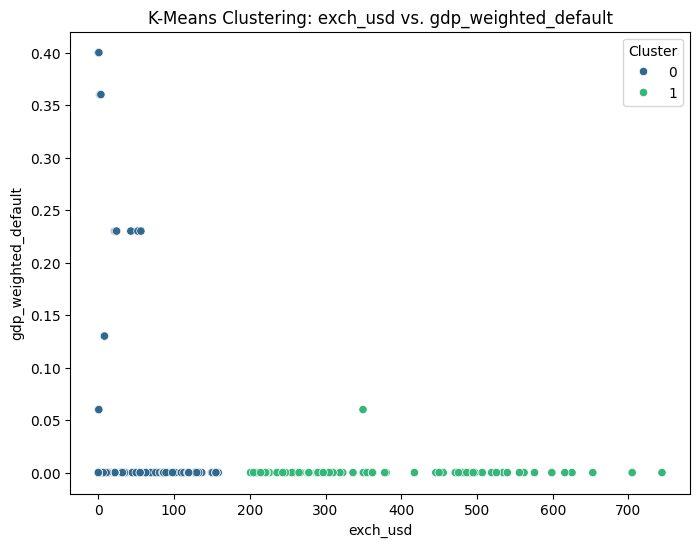

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Memilih fitur
# Gunakan X yang sudah ada dan sudah diproses

# Menentukan jumlah cluster optimal menggunakan elbow method
inertia = []
silhouette_scores = []
for n in range(2, 10):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    
    # Hitung silhouette score
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot elbow method untuk membantu menentukan jumlah klaster yang optimal
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Number')
plt.show()

# Plot silhouette score untuk membantu menentukan jumlah klaster yang optimal
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Cluster Number')
plt.show()

# Pengelompokan menggunakan K-Means dengan jumlah cluster yang telah ditentukan sebelumnya, yaitu 2
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(X)

# Menambahkan hasil kluster ke dalam dataset
df['cluster'] = kmeans.labels_

# Evaluasi akhir dengan silhouette score untuk jumlah cluster yang dipilih
final_silhouette_score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score untuk {optimal_clusters} cluster: {final_silhouette_score:.4f}')

# Visualisasi 1: exch_usd vs gdp_weighted_default
plt.figure(figsize=(8, 6))
sns.scatterplot(x='exch_usd', y='gdp_weighted_default', hue='cluster', palette='viridis', data=df)
plt.title('K-Means Clustering: exch_usd vs. gdp_weighted_default')
plt.xlabel('exch_usd')
plt.ylabel('gdp_weighted_default')
plt.legend(title='Cluster')
plt.show()